This notebook is a follow up on the supervised ML notebook.
It uses the same dataset but this time tests unsupervised ML to cluster the data.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
data=pd.read_csv("/home/kasia/data_ML/ML_data.csv")
data=data.set_index("id")

In [27]:
#Data scaling
X=data.iloc[:,1:].to_numpy()
Y=data.loc[:,"diagnosis"]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

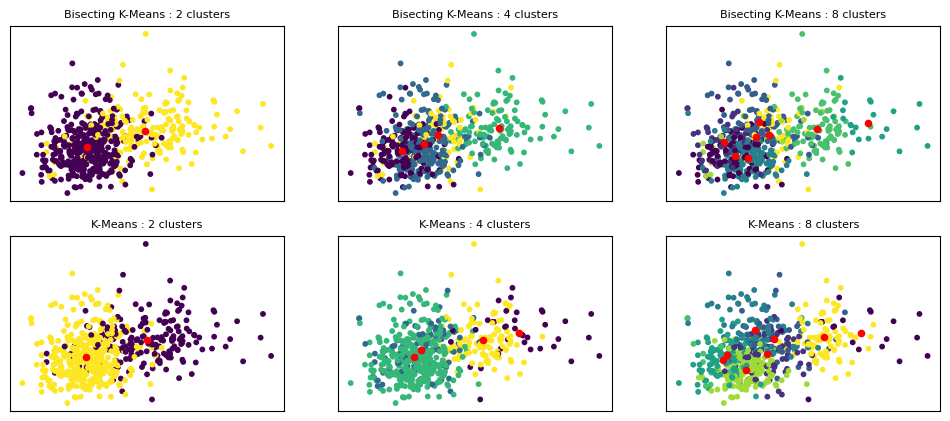

In [32]:
#Data clustering - comparison of two algorithms

random_state = 42

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [2, 4, 8]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X_std)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X_std[:, 0], X_std[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)
        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters", fontdict={"fontsize":8})

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()